<a href="https://colab.research.google.com/github/ivonnics/Machine-Learning/blob/master/SCATTER_MATRIX_EXAMPLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taken from:

https://github.com/myrthings/catscatter

and 

https://medium.com/red-panda-ai/painting-with-python-and-matplotlib-279da029dce6

In [46]:
import pandas as pd
import matplotlib
#import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))


def scatter_matrix(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    '''
    Goal: This function create an scatter plot for categorical variables. It's useful to compare two lists with elements in common.
    Input:
        - df: required. pandas DataFrame with at least two columns with categorical variables you want to relate, and the value of both (if it's just an adjacent matrix write 1)
        - colx: required. The name of the column to display horizontaly
        - coly: required. The name of the column to display vertically
        - cols: required. The name of the column with the value between the two variables
        - color: optional. Colors to display in the visualization, the length can be two or three. The two first are the colors for the lines in the matrix, the last one the font color and markers color.
            default ['grey','black']
        - ratio: optional. A ratio for controlling the relative size of the markers.
            default 10
        - font: optional. The font for the ticks on the matrix.
            default 'Helvetica'
        - save: optional. True for saving as an image in the same path as the code.
            default False
        - save_name: optional. The name used for saving the image (then the code ads .png)
            default: "Default"
    Output:
        No output. Matplotlib object is not shown by default to be able to add more changes.
    '''
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']=color[-1]
    plt.rcParams['ytick.color']=color[-1]
    #plt.box(False)
    frameon=False

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        matplotlib.pyplot.hlines(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
        #plt.colx_codes(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
    for num in range(len(colx_codes)):
        matplotlib.pyplot.vlines(num,-1,len(coly_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
        
    # Plot the scatter plot with the numbers
    matplotlib.pyplot.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])
    
    # Change the ticks numbers to categories and limit them
    matplotlib.pyplot.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    matplotlib.pyplot.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    matplotlib.pyplot.xlim(xmin=-1,xmax=len(colx_codes))
    matplotlib.pyplot.ylim(ymin=-1,ymax=len(coly_codes))
    
    # Save if wanted
    if save:
        matplotlib.pyplot.savefig(save_name+'.png')

matplotlib: 3.2.1


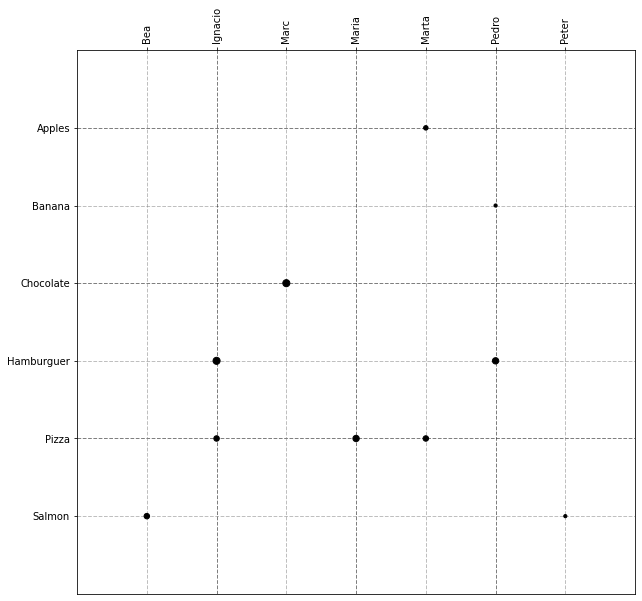

In [47]:
#import pandas as pd
#import matplotlib as plt
#from catscatter import catscatter

# example data frame
data=pd.DataFrame({'friend':['Peter','Marc','Ignacio','Marta','Marta','Ignacio','Maria','Pedro','Bea','Pedro'],
                  'favorite_food':['Salmon','Chocolate','Hamburguer','Pizza','Apples','Pizza','Pizza','Hamburguer','Salmon','Banana'],
                  'favorite_grade':[1,5,5,3,2,3,4,4,3,1]})

#plot it
#catscatter(data,'friend','favorite_food','favorite_grade')
scatter_matrix(data,'friend','favorite_food','favorite_grade')
matplotlib.pyplot.show()

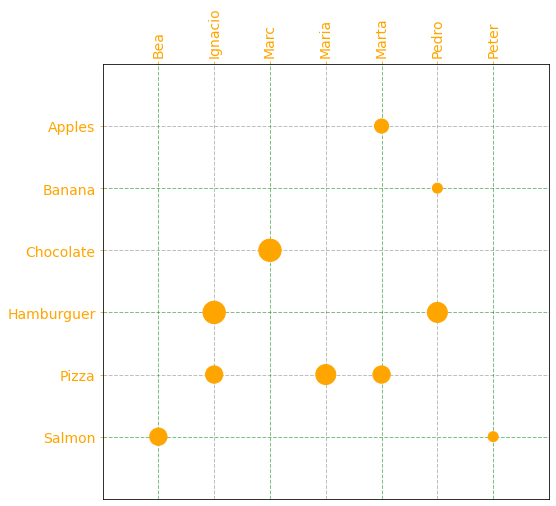

In [48]:
#import pandas as pd
#import matplotlib as plt
#from catscatter import catscatter

# example data frame
data=pd.DataFrame({'friend':['Peter','Marc','Ignacio','Marta','Marta','Ignacio','Maria','Pedro','Bea','Pedro'],
                  'favorite_food':['Salmon','Chocolate','Hamburguer','Pizza','Apples','Pizza','Pizza','Hamburguer','Salmon','Banana'],
                  'favorite_grade':[1,5,5,3,2,3,4,4,3,1]})

colors=['green','grey','orange']

#create the plot
matplotlib.pyplot.figure(figsize=(8,8))
scatter_matrix(data,'friend','favorite_food','favorite_grade',color=colors,ratio=100)
matplotlib.pyplot.xticks(fontsize=14)
matplotlib.pyplot.yticks(fontsize=14)
matplotlib.pyplot.show()

In [0]:
import numpy as np
from matplotlib import pyplot as plt 
#import matplotlib
from collections import deque

MASK_VAL = -1
ROWS, COLS = 7, 10
TARGET_LABEL = "Target"

#Make a repeatably pseudo-random boolean matrix of ROWS x COLS
np.random.seed(seed=42)
master_matrix = np.random.randint(2, size=(ROWS, COLS))


def solution(my_matrix, my_point):
    """Paints a boolean matrix at my_point and along all adjacent points to the opposite color"""
    original_matrix = my_matrix.copy()
    def get_adjacent_same(a_point, a_matrix):
        """Returns points that are both adjacent to the given point and are the same value"""
        # val = a_matrix[a_point]
        max_x, max_y = a_matrix.shape
        x, y = a_point[:]

        points = ((x, y), (x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1))
        result = []
        for _x, _y in points:
            if (0 <= _x < max_x) and (0 <= _y < max_y):
                if a_matrix[(_x,_y)] == val:
                    new_point = (_x, _y)
                    result.append(new_point)
                    my_matrix[new_point] ^= 1

        return result

    def show_plot(plots):
        """Visualizes our solution"""
        _, axarr = plt.subplots(1,len(plots))
        for i in range(len(plots)):
            data = plots[i][1]
            cmap = matplotlib.cm.spring
            axarr[i].set_title(plots[i][0])
            axarr[i].set_yticklabels([])
            axarr[i].set_xticklabels([])
            if plots[i][0] == TARGET_LABEL:
                axarr[i].set_title(str(my_point))
                cmap.set_bad(color='white')
                masked_array = np.ma.masked_where(data == MASK_VAL, data)
                axarr[i].imshow(masked_array, cmap='flag')
            else:
                axarr[i].imshow(data, cmap='flag')               
            axarr[i].tick_params(axis='both', which='both', bottom=False, top=False,
                 left=False, labelbottom=False)

        plt.show()
        plt.close()

    # Start with just the main point
    same_color_points = deque([my_point])
    val = original_matrix[my_point]
    
    # Create a masked field for the solution plot display, so that it can be white
    solution = np.arange(ROWS * COLS).reshape((ROWS, COLS))
    solution.fill(MASK_VAL)
    
    # Flip everything 
    %%timeit
    while same_color_points:
        a_point = same_color_points.popleft()
        same_color_points.extend(get_adjacent_same(a_point, my_matrix))
        solution[a_point] = val

    # Highlight the provided point in the original problem in the solution plot
    solution[my_point] = 1 - val
    plt.rcParams["figure.figsize"] = [10, 10] 
    show_plot([("Original", original_matrix), (TARGET_LABEL, solution), ("Repaint", my_matrix)])

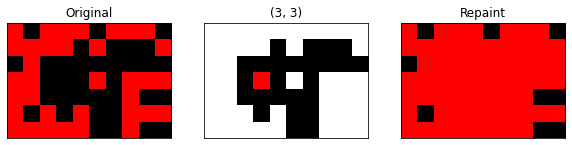

In [50]:

solution(master_matrix.copy(), (3, 3))

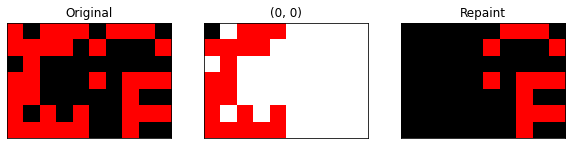

In [51]:
solution(master_matrix.copy(), (0, 0))

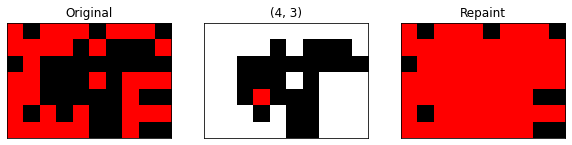

In [52]:
solution(master_matrix.copy(), (4, 3))

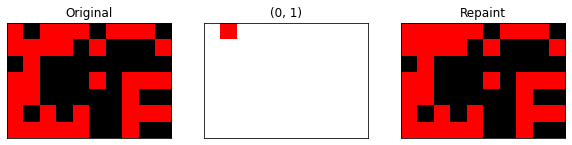

In [53]:
solution(master_matrix.copy(), (0, 1))